In [1]:
import matplotlib.pyplot as plt
import numpy as np
import warnings

def fftPlot(sig, dt=None, block=False, plot=True):
    # here it's assumes analytic signal (real signal...)- so only half of the axis is required

    if dt is None:
        dt = 1
        t = np.arange(0, sig.shape[-1])
        xLabel = 'samples'
    else:
        t = np.arange(0, sig.shape[-1]) * dt
        xLabel = 'freq [Hz]'

    if sig.shape[0] % 2 != 0:
        warnings.warn("signal prefered to be even in size, autoFixing it...")
        t = t[0:-1]
        sig = sig[0:-1]

    sigFFT = np.fft.fft(sig) / t.shape[0]  # divided by size t for coherent magnitude

    freq = np.fft.fftfreq(t.shape[0], d=dt)

    # plot analytic signal - right half of freq axis needed only...
    firstNegInd = np.argmax(freq < 0)
    freqAxisPos = freq[0:firstNegInd]
    sigFFTPos = 2 * sigFFT[0:firstNegInd]  # *2 because of magnitude of analytic signal

    if plot:
        plt.figure()
        plt.plot(freqAxisPos, np.abs(sigFFTPos))
        plt.xlabel(xLabel)
        plt.ylabel('mag')
        plt.title('Analytic FFT plot')
        plt.show(block=block)

    return sigFFTPos, freqAxisPos




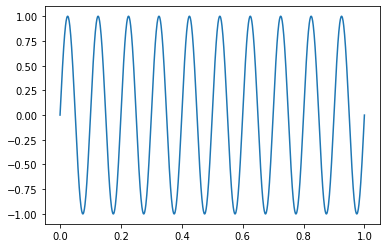

In [2]:
dt = 1 / 1000
f0 = 10 # 1 / dt / 4

t = np.arange(0, 1 + dt, dt)
sig = np.sin(2 * np.pi * f0 * t+100) + 10 * np.sin(2 * np.pi * f0 / 2 * t)
sig = np.sin(2 * np.pi * f0 * t) #+ 10 * np.sin(2 * np.pi * f0 / 2 * t)

plt.figure()
plt.plot(t,sig)


<ipython-input-1-8d662b7a1907>:17: UserWarning: signal prefered to be even in size, autoFixing it...
  warnings.warn("signal prefered to be even in size, autoFixing it...")


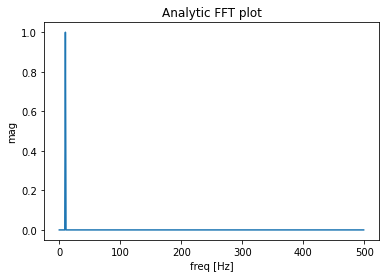

(array([-1.35218361e-16+0.00000000e+00j,  2.51116358e-16+1.63881828e-16j,
        -4.48772555e-16+3.64153152e-16j, -2.39670412e-16-4.54777765e-16j,
        -1.07278937e-16+5.28234172e-17j,  2.77492410e-17-2.85786190e-16j,
         1.68511446e-16-1.35447209e-16j,  6.40567282e-19+2.09689624e-16j,
         9.43993617e-17-2.98571023e-17j, -3.15811420e-17+2.14127214e-16j,
        -5.48316469e-16-1.00000000e+00j,  2.44928224e-17-1.46480675e-16j,
         6.56938963e-17-1.27299000e-16j,  2.51267948e-17+6.76800287e-17j,
        -4.74693753e-17+7.21903649e-17j, -1.34990357e-16-1.20519190e-17j,
         1.84769562e-17-1.00473535e-17j, -3.12726552e-16+2.88905718e-16j,
        -4.78981749e-16-3.45971691e-16j,  1.84697778e-16-2.43001362e-16j,
        -2.15683731e-17-5.61723085e-17j, -9.19427221e-17-6.74995699e-17j,
        -3.83232221e-17-1.81242895e-16j, -4.89189737e-17-2.01467725e-16j,
        -1.43016201e-16+5.85657552e-17j,  1.57895305e-16-3.06069319e-16j,
         1.66458829e-16-2.33965040e-16

In [3]:
fftPlot(sig, dt=dt, block=True)


